## INTRODUCTION 


Divorce Predictors Scale (DPS) was used to carry out divorce predictions on the basis of Gottman couples therapy. Of the participants, 84 (49%) were divorced and 86 (51%) were married couples and were made to complete a “Personal Information Form” and “Divorce Predictors Scale”, answering a series of questions relating to their perception of their relationship on a scale of 0-4, pertaining to how much one agrees with the statement given.
Our study aims to find the accuracy of the significant questions in the Divorce Predictors Scale that affect divorce. In our study, we will choose the 6 most signifiance questions, and apply a direct classification model to answer our research question. Our research question is as follows:
"Based on one's answers to the 6 questions, what is their likelyhood that their marriage will end in divorce?" 

Dataset provided by our source is of a zip format. Since they are difficult to load into R, we first converted the original zip file into a csv fil, and have link the zip file and the reformatted csv file in our methods section. 


In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 row

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## PREMILINARY EXPLORATORY DATA ANALYSIS

#### Let's load, clean and visualize the data:

In [2]:
#Reading in the data from github
#link directly to zipped dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00497/
#link to Center for Machine Learning and Intelligent Systems: https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set
#link to origional study: https://dergipark.org.tr/en/pub/nevsosbilen/issue/46568/549416
div_data <- read_delim("https://raw.githubusercontent.com/shjuliay/group107/main/divorce%20(1).csv") %>%
mutate(Divorced = as.factor(Class))

"Divorce data:"
div_data

#Creating a table of the number of divorced and not divorced
div_sum <- div_data %>%
group_by(Divorced) %>%
    summarize(n = n())
#div_sum


"No rows have missing data."


Rows: 170 Columns: 55
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (55): Atr1, Atr2, Atr3, Atr4, Atr5, Atr6, Atr7, Atr8, Atr9, Atr10, Atr11...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Divorce data:"

Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,⋯,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class,Divorced
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,2,4,1,0,0,0,0,0,0,⋯,1,3,3,3,2,3,2,1,1,1
4,4,4,4,4,0,0,4,4,4,⋯,2,3,4,4,4,4,2,2,1,1
2,2,2,2,1,3,2,1,1,2,⋯,2,3,1,1,1,2,2,2,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,1,0,0,0,0,0,0,0,1,⋯,0,2,0,1,1,3,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,3,2,2,3,2,4,3,1,0,0
0,0,0,0,0,0,0,1,0,0,⋯,4,4,0,1,3,3,3,1,0,0


[1] "No rows have missing data."






#### Here, we find the means for each of our married and divorced questions. The 6 questions with the greatest mean difference are the questions we will use for our data analysis.

In [3]:
#Creating a table for the mean answer for each question: divorced
sum_div <- div_data %>%
filter(Divorced == 1) |>
select(-Divorced) %>%
    map_df(mean)

sum_div_longer <- sum_div %>%
pivot_longer(cols = Atr1:Atr54,
             names_to = "Atribute_D") |>
    rename(mean_divorced = value) 


"Mean answers for divorced:"
sum_div_longer


#Creating a table for the mean answer for each question: not divorced
sum_notdiv <- div_data %>%
filter(Divorced == 0) %>%
select(-Divorced) %>%
    map_df(mean) 


sum_notdiv_longer <- sum_notdiv %>%
pivot_longer(cols = Atr1:Atr54,
             names_to = "Atribute_M") |>
    rename(mean_married = value)


"Mean answers for not divorced:"
sum_notdiv_longer



[1] "Mean answers for divorced:"

Class,Atribute_D,mean_divorced
<dbl>,<chr>,<dbl>
1,Atr1,3.190476
1,Atr2,2.869048
1,Atr3,2.916667
⋮,⋮,⋮
1,Atr52,3.488095
1,Atr53,3.321429
1,Atr54,3.369048


[1] "Mean answers for not divorced:"

Class,Atribute_M,mean_married
<dbl>,<chr>,<dbl>
0,Atr1,0.3953488
0,Atr2,0.4651163
0,Atr3,0.6395349
⋮,⋮,⋮
0,Atr52,1.5697674
0,Atr53,1.1860465
0,Atr54,0.6860465


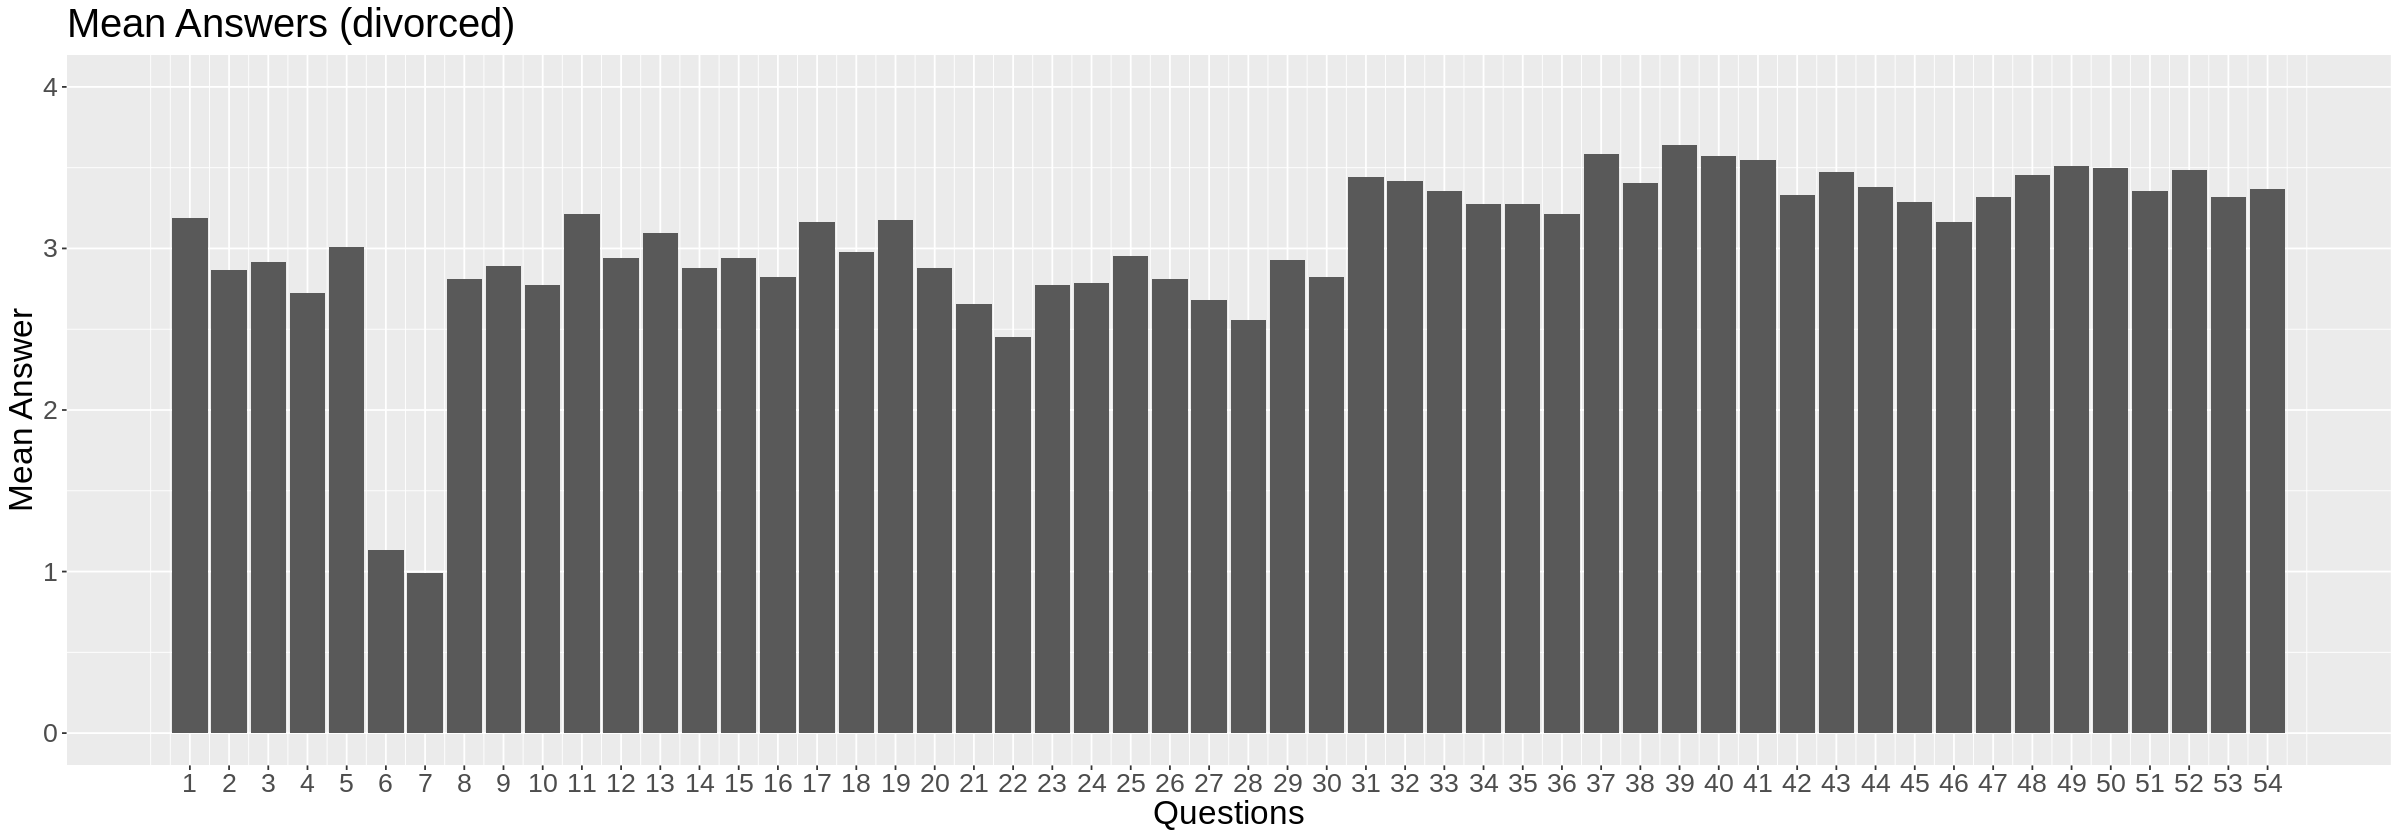

In [4]:
#creating visualizations of 6 predictor questions (divorced)
options(repr.plot.width = 20, repr.plot.height = 7)

sum_div_bar <- sum_div_longer %>%
mutate(Atribute_D = as.numeric(substring(Atribute_D, 4, 5))) |>
arrange(Atribute_D) |>
ggplot(aes(x = Atribute_D, y = mean_divorced)) +
geom_bar(stat = "identity") +
labs(x = "Questions", y = "Mean Answer") +
theme(text = element_text(size = 20)) +
ggtitle("Mean Answers (divorced)") +
ylim(0, 4) +
scale_x_continuous(breaks = c(1:54))
sum_div_bar

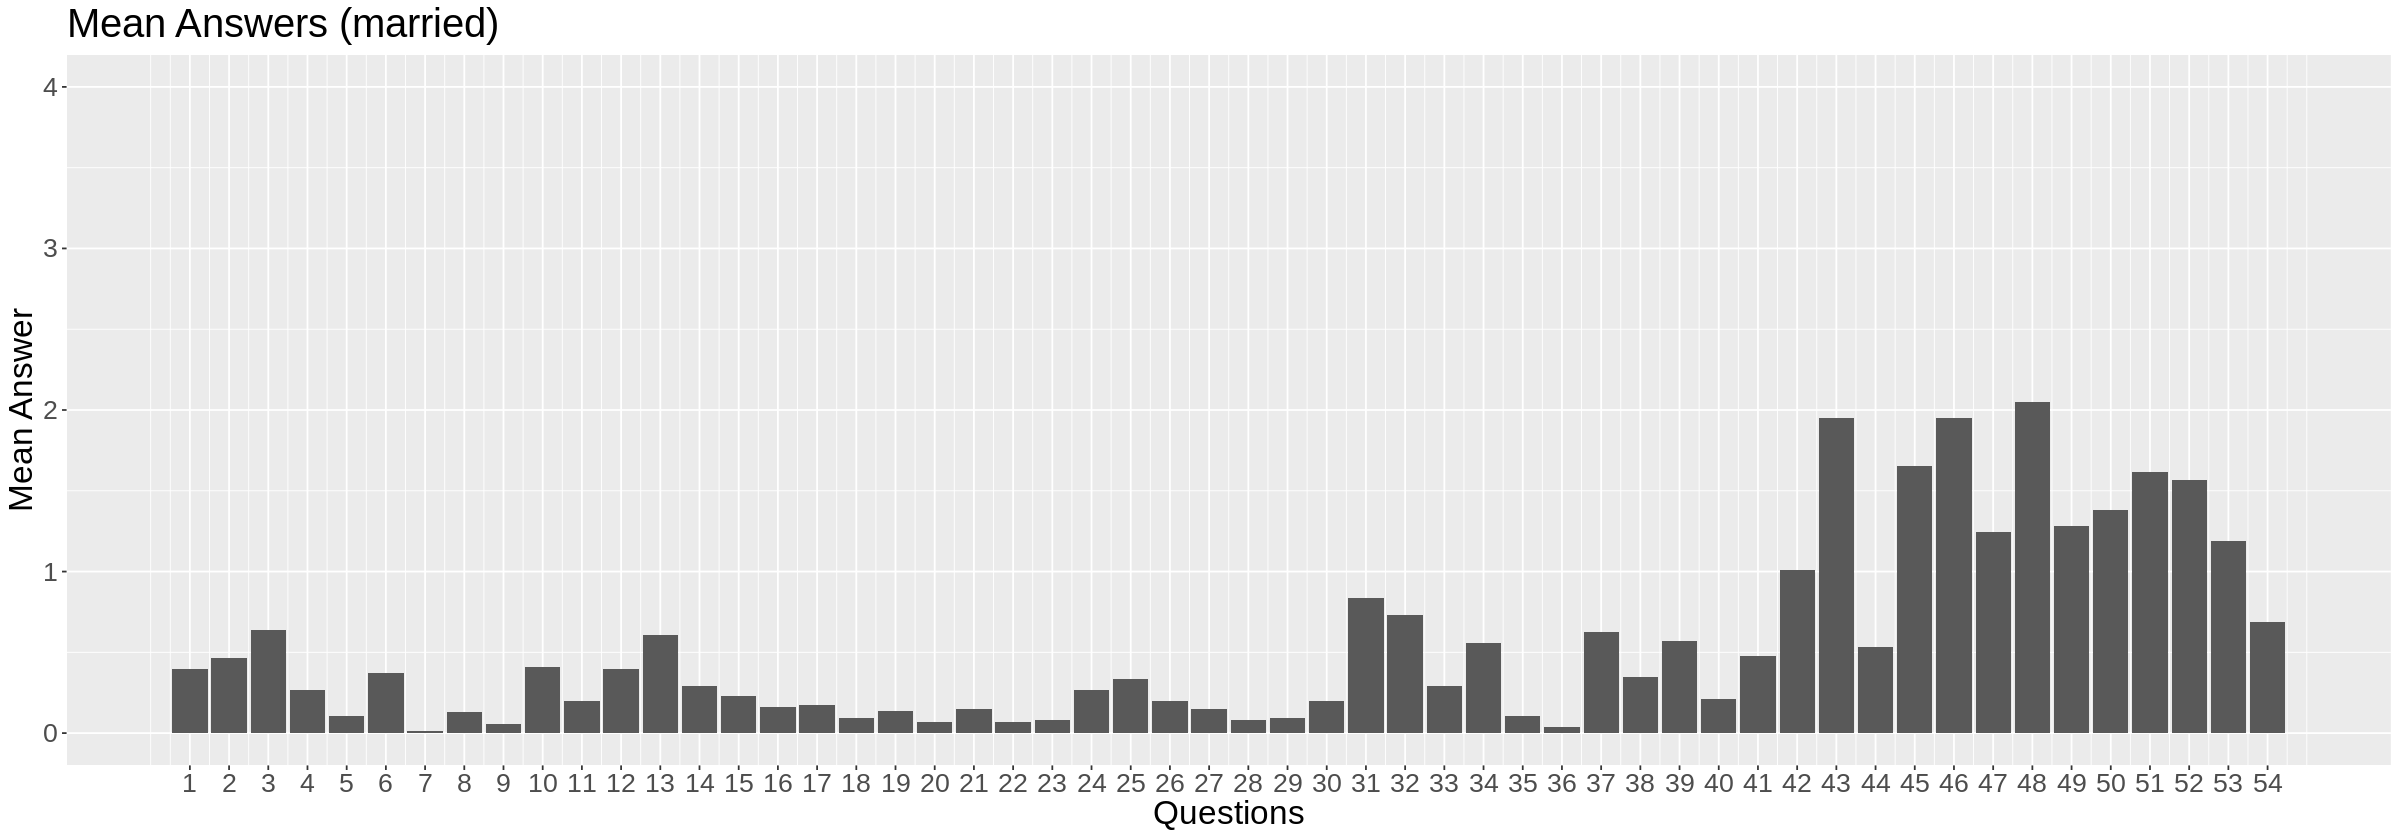

In [5]:
#creating visualizations of 6 predictor questions (married)
options(repr.plot.width = 20, repr.plot.height = 7)

sum_notdiv_bar <- sum_notdiv_longer %>%
mutate(Atribute_M = as.numeric(substring(Atribute_M, 4, 5))) |>
arrange(Atribute_M) |>
ggplot(aes(x = Atribute_M, y = mean_married)) +
geom_bar(stat = "identity") +
labs(x = "Questions", y = "Mean Answer") +
theme(text = element_text(size = 20)) +
ggtitle("Mean Answers (married)") +
ylim(0, 4) +
scale_x_continuous(breaks = c(1:54))
sum_notdiv_bar

Let's calculate and visualize the means:

[1] "Difference between all Atributes"

Atribute_M,mean_divorced,mean_married,diff
<chr>,<dbl>,<dbl>,<dbl>
Atr6,1.1309524,0.37209302,0.7588594
Atr7,0.9880952,0.01162791,0.9764673
Atr46,3.1666667,1.95348837,1.2131783
⋮,⋮,⋮,⋮
Atr35,3.273810,0.10465116,3.169158
Atr36,3.214286,0.03488372,3.179402
Atr40,3.571429,0.20930233,3.362126


[1] "Difference for most significant 6"

,Atribute_M,mean_divorced,mean_married,diff
,<chr>,<dbl>,<dbl>,<dbl>
49,Atr33,3.357143,0.29069767,3.066445
50,Atr41,3.547619,0.47674419,3.070875
51,Atr39,3.642857,0.56976744,3.073090
52,Atr35,3.273810,0.10465116,3.169158
53,Atr36,3.214286,0.03488372,3.179402
54,Atr40,3.571429,0.20930233,3.362126


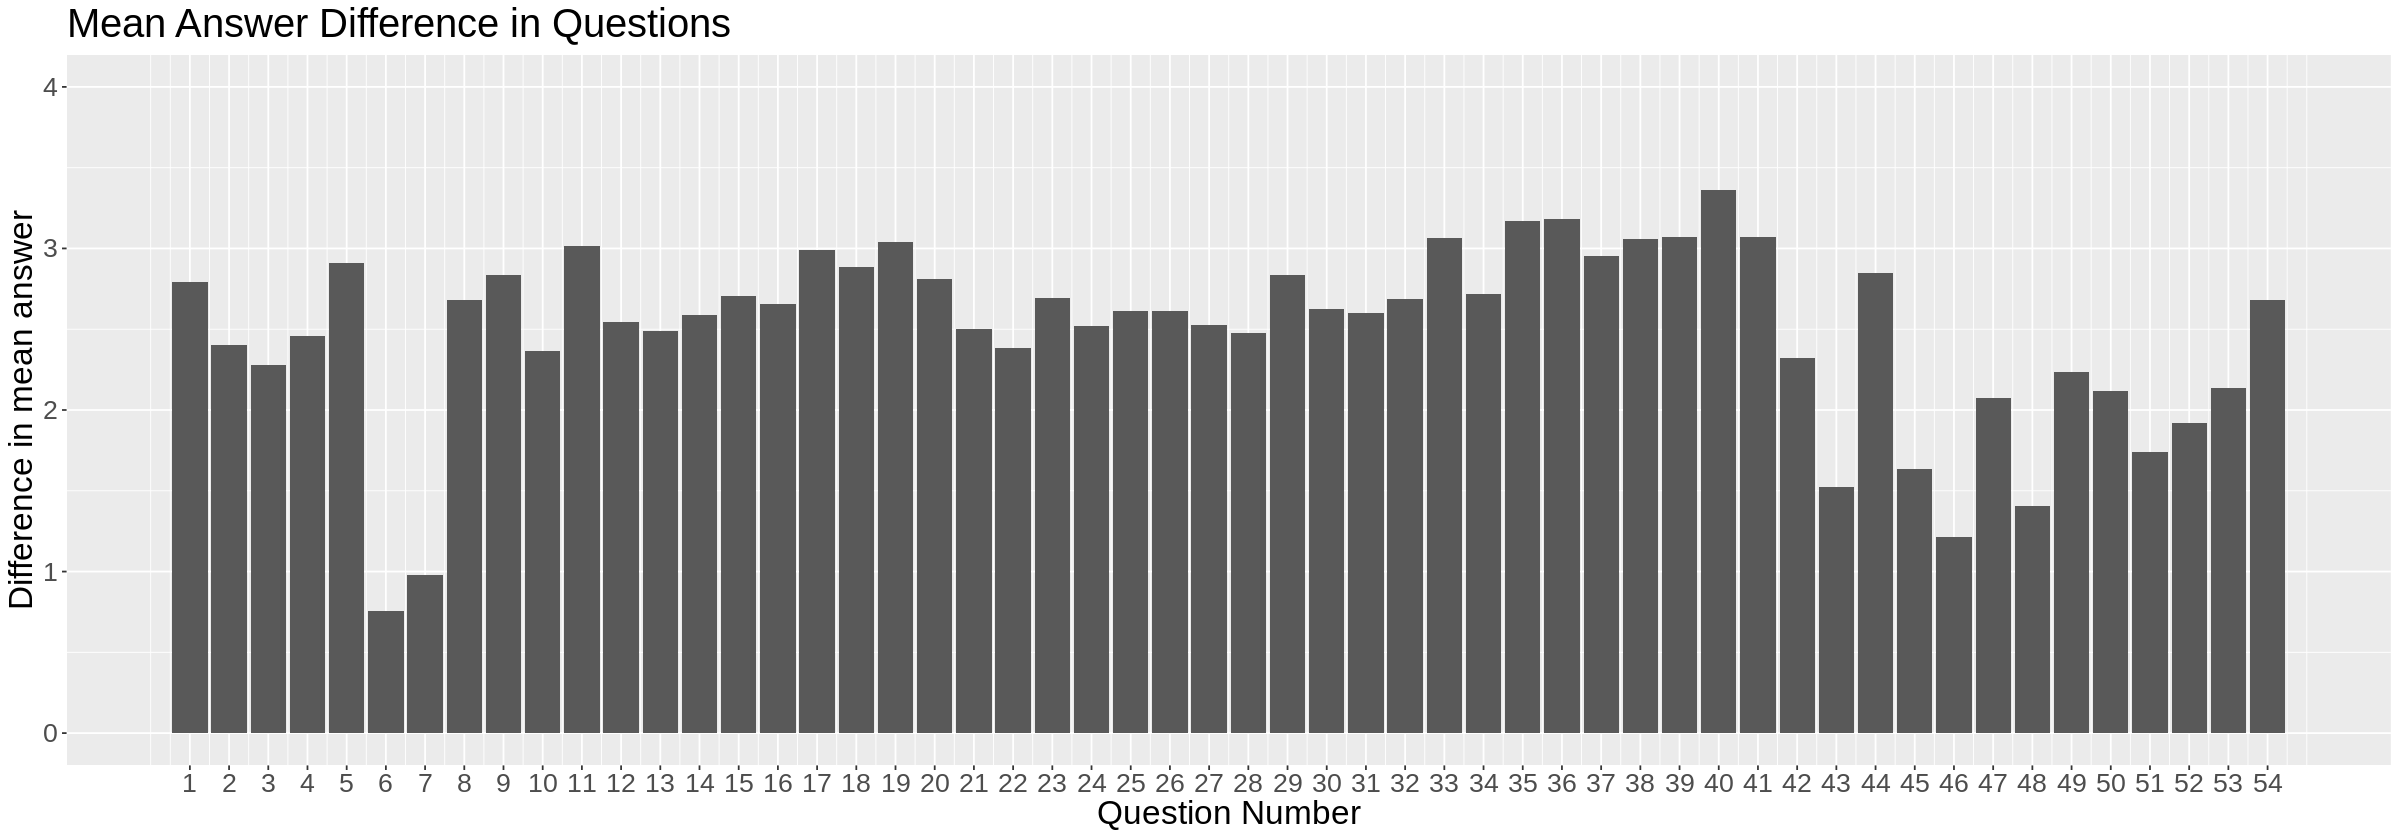

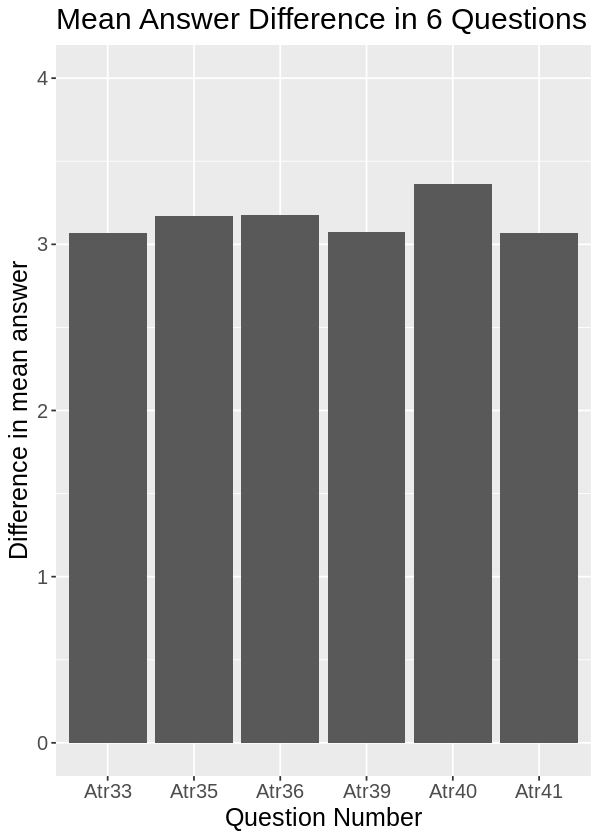

In [15]:
#table for all difference
difference <- cbind(sum_div_longer[2:3], sum_notdiv_longer) |>
   select(Atribute_M, mean_divorced, mean_married) |>
   mutate(diff = mean_divorced - mean_married) |>
     arrange(diff)

options(repr.plot.width = 20, repr.plot.height = 7)

#plot for all difference
difference_plot <- difference |>
    mutate(Atribute_M = as.numeric(substring(Atribute_M, 4, 5))) |>
    ggplot(aes(x = Atribute_M, y = diff)) + geom_bar(stat = "identity") +
    labs(x = "Question Number", y = "Difference in mean answer", title = "Mean Answer Difference in Questions") +
    theme(text = element_text(size = 20)) +
    ylim(0, 4) +
    scale_x_continuous(breaks = c(1:54))

difference_plot
    
"Difference between all Atributes"
difference

options(repr.plot.width = 5, repr.plot.height = 7)
"Difference for most significant 6" 
difference_6 <- difference |>
    tail(n = 6)
difference_6

difference_6_plot <- difference_6 |>
    ggplot(aes(x = Atribute_M, y = diff)) + geom_bar(stat = "identity") +
    labs(x = "Question Number", y = "Difference in mean answer", title = "Mean Answer Difference in 6 Questions") +
    theme(text = element_text(size = 15)) +
    ylim(0, 4) 
difference_6_plot


Looks like most of the questions have quite large differences. Here are the 6 questions that were found to have the greatest mean differences:

In [7]:
#Reading in the questions
div_questions <- read_delim("https://raw.githubusercontent.com/shjuliay/group107/main/DivorceQuestions.txt", delim = ":", col_names = FALSE) %>%
mutate(QuestionNumber = X1, Question = X2) %>%
select(QuestionNumber, Question)
#div_questions

div_6questions <- div_questions %>%
filter(QuestionNumber == 33 | QuestionNumber == 41 | QuestionNumber == 39 | QuestionNumber == 35 | QuestionNumber == 36 | QuestionNumber == 40)
div_6questions

Rows: 55 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ":"
chr (1): X2
dbl (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


QuestionNumber,Question
<dbl>,<chr>
33,I can use negative statements about my spouse's personality during our discussions.
35,I can insult my spouse during our discussions.
36,I can be humiliating when we discussions.
39,Our discussions often occur suddenly.
40,We're just starting a discussion before I know what's going on.
41,"When I talk to my spouse about something, my calm suddenly breaks."


#### Now that we've determined the 6 most significant questions, let's train and create our classifer. 

In [23]:
#Creating a classification prediction model

set.seed(2)

div_data_split <- div_data %>%
    initial_split(prop = 0.75, strata = Divorced)

#Splitting the data into training and testing
div_testing <- testing(div_data_split)
#div_testing
div_training <- training(div_data_split)
#div_training

#Splitting the training into subtraining and subtesting
div_training_split <- initial_split(div_training, prop = 0.75, strata = Divorced)
div_subtraining <- training(div_training_split)
div_subtraining
div_subtesting <- testing(div_training_split)
div_subtesting

Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,⋯,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class,Divorced
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,1,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,1,1,0,0,0,1,1,1,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,2,0,0,1,2,2,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2,2,2,3,2,3,2,1,3,2,⋯,3,3,2,1,1,2,2,2,1,1
4,2,4,2,1,2,3,1,1,3,⋯,1,3,3,3,3,1,1,1,1,1
4,4,3,3,2,0,2,4,4,3,⋯,2,2,2,3,3,3,3,4,1,1


Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,⋯,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class,Divorced
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,1,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,0,1,1,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,2,3,2,2,1,1,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,2,4,3,3,2,3,2,2,3,⋯,0,3,3,3,3,3,3,3,1,1
4,4,3,4,4,0,0,4,4,4,⋯,2,3,2,2,2,2,1,2,1,1
3,3,2,2,2,2,2,2,2,2,⋯,1,3,2,2,2,4,4,4,1,1


In [24]:
#Creating standardization recipe
div_recipe <- recipe(Divorced ~ Atr40 + Atr36 + Atr35 + Atr39 + Atr33 + Atr41, data = div_subtraining) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

#Creating the knn model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

#Fit the knn model
div_fit <- workflow() %>%
  add_recipe(div_recipe) %>%
  add_model(knn_spec) %>%
  fit(data = div_subtraining)

#Creating vfold

div_vfold <- vfold_cv(div_subtraining, v = 10, strata = Divorced)
#div_vfold

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 2))

#Creating workflow 
knn_results <- workflow() %>%
  add_recipe(div_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = div_vfold, grid = k_vals) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy")
accuracies

Warning message:
“tune samples were requested but there were 95 rows in the data. 90 will be used.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9788889,10,0.01409842,Preprocessor1_Model01
3,accuracy,binary,0.9788889,10,0.01409842,Preprocessor1_Model02
5,accuracy,binary,0.9788889,10,0.01409842,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
15,accuracy,binary,0.9688889,10,0.01586984,Preprocessor1_Model08
17,accuracy,binary,0.9688889,10,0.01586984,Preprocessor1_Model09
19,accuracy,binary,0.9688889,10,0.01586984,Preprocessor1_Model10


Let's visualize the accuracy table:

Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 row(s) containing missing values (geom_path).”


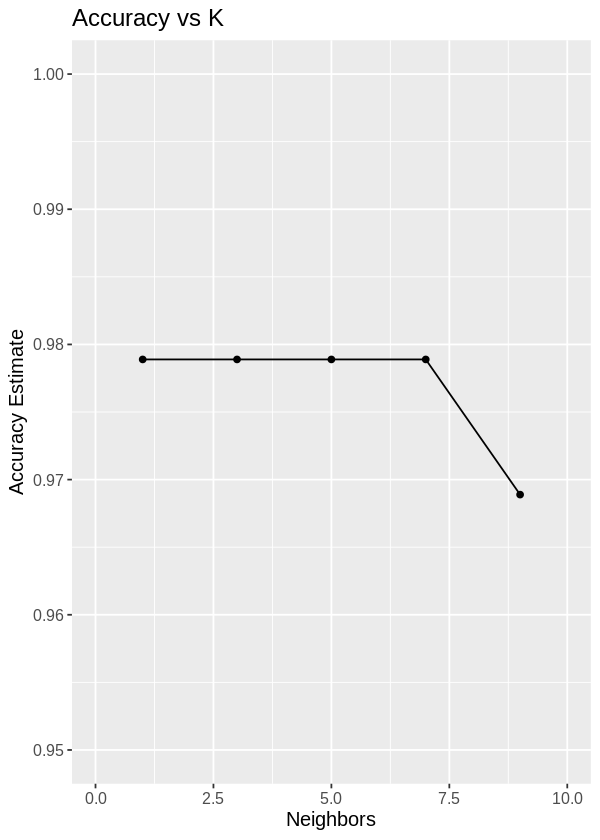

In [27]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12)) +
  xlim(0, 10) +
  ylim(.95, 1) +
  ggtitle("Accuracy vs K")

accuracy_vs_k

Looks like we can use 2 neighbours give us the highest accuracy. Our accuracy graph looks a bit unusual. Below, we determine the confusion matrix and graph the attributes, which may explain our results. 

In [30]:
div_predictions <- predict(div_fit, div_testing) %>%
bind_cols(div_testing)
div_predictions

div_conf_mat <- div_predictions %>%
    conf_mat(truth = Divorced, estimate = .pred_class)
div_conf_mat
print("This means the predictions are accurate: only three(no?)!!! person is incorrectly classified")

.pred_class,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,⋯,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class,Divorced
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0,0,1,0,0,2,0,0,0,⋯,2,1,2,1,1,1,2,0,1,1
1,2,1,2,2,2,1,0,3,3,⋯,1,2,2,2,1,1,1,0,1,1
0,1,1,1,1,1,2,0,2,2,⋯,0,2,2,2,2,4,3,3,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0,3,2,0,0,0,0,0,0,⋯,4,3,1,1,1,2,0,1,0,0
0,2,0,1,0,0,0,0,0,0,⋯,0,2,0,0,2,1,0,0,0,0
0,0,0,0,0,0,0,0,1,0,⋯,4,4,0,1,3,3,3,1,0,0


          Truth
Prediction  0  1
         0 22  2
         1  0 19

[1] "This means the predictions are accurate: only three(no?)!!! person is incorrectly classified"


[1] "To see why this is the case, and to confirm our method is correct, we can check how the to be divorced and non-divorced people answered these questions:"


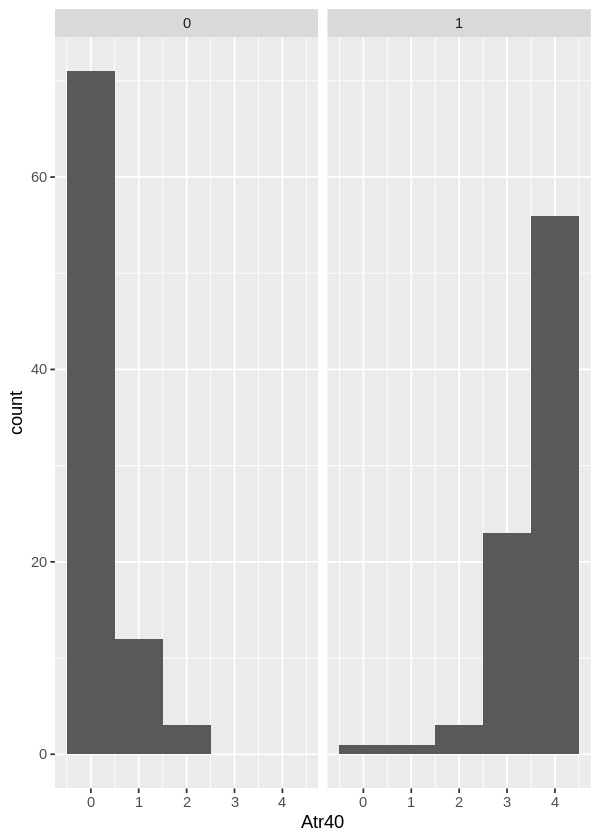

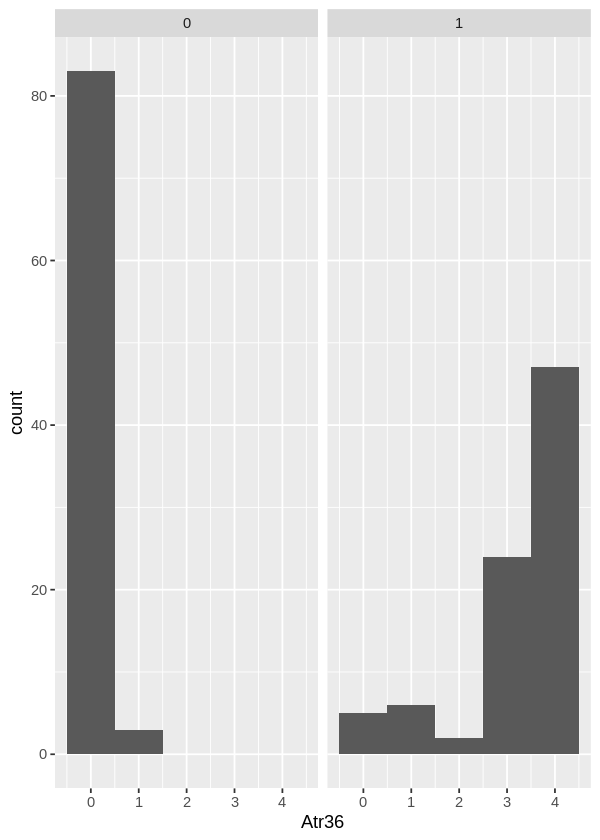

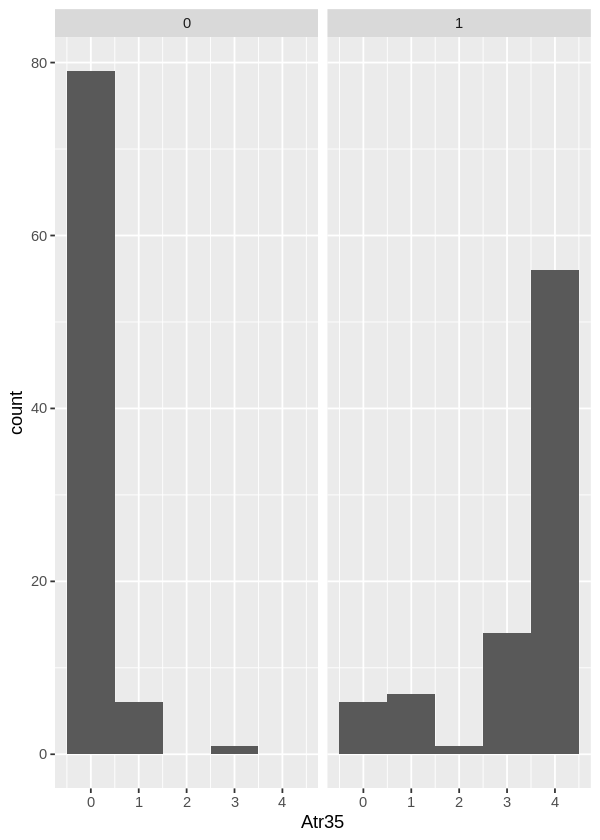

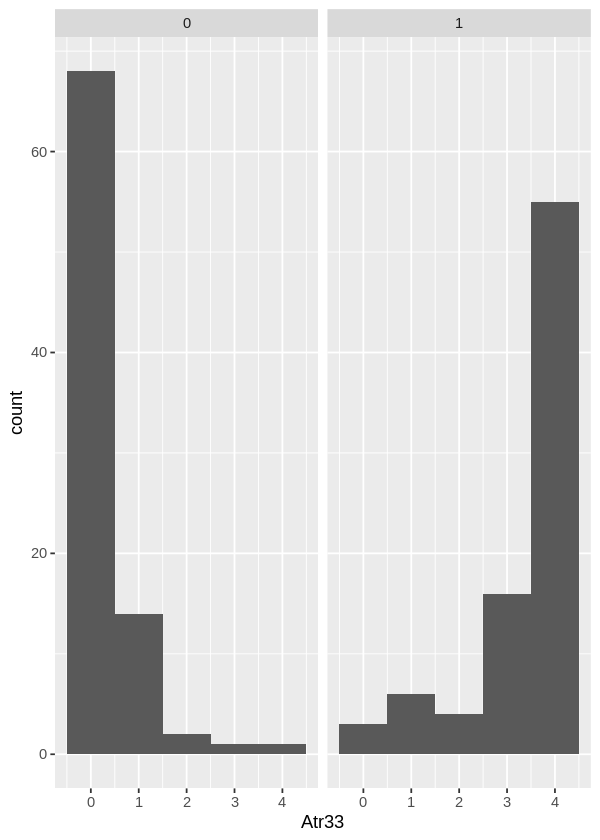

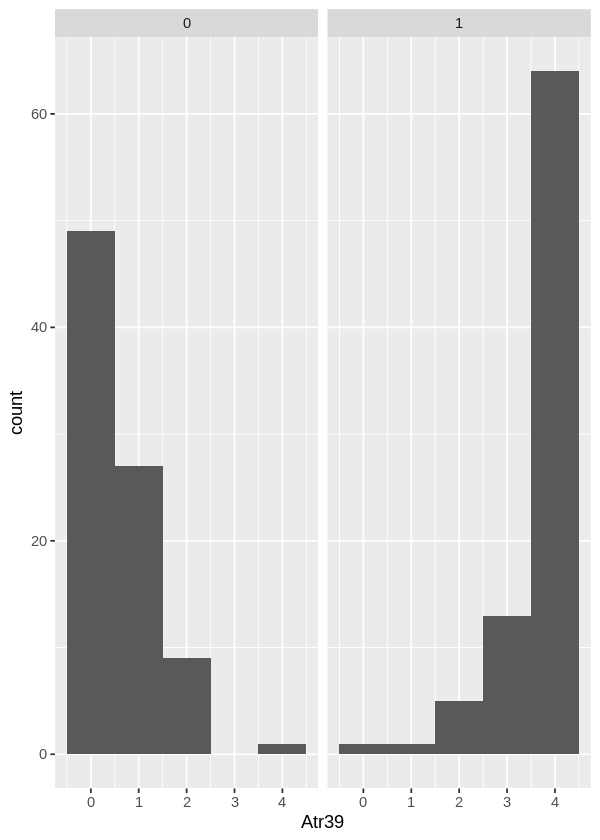

[1] "Evidently, there is a major difference in how the two groups answered and so it is very easy for our model to accuratly predict their class"


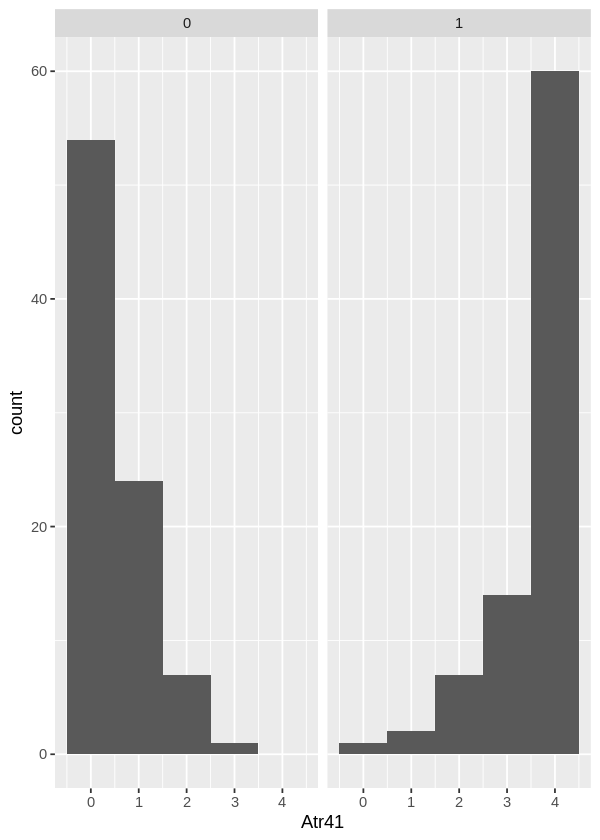

In [31]:
#div_2 <- div_data %>%
#    filter(Divorced == 1) %>%
#    select(Atr2)
#div_2_dist <- div_2 %>%
#    ggplot(aes(x = Atr2)) +
#    geom_histogram(binwidth = 1) +
#    ggtitle("Q2 Answer Distribution: Divorced")
#div_2_dist

#notdiv_2 <- div_data %>%
#    filter(Divorced == 0) %>%
#    select(Atr2)
#notdiv_2_dist <- notdiv_2 %>%
#    ggplot(aes(x = Atr2)) +
#    geom_histogram(binwidth = 1) +
#    ggtitle("Q2 Answer Distribution: Not Divorced")
#notdiv_2_dist

#Visualizing how the two groups answered
print("To see why this is the case, and to confirm our method is correct, we can check how the to be divorced and non-divorced people answered these questions:")

div_40_plot <- div_data %>%
    select(Atr40, Divorced) %>%
    ggplot(aes(x = Atr40)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_40_plot

div_36_plot <- div_data %>%
    select(Atr36, Divorced) %>%
    ggplot(aes(x = Atr36)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_36_plot

div_35_plot <- div_data %>%
    select(Atr35, Divorced) %>%
    ggplot(aes(x = Atr35)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_35_plot

div_33_plot <- div_data %>%
    select(Atr33, Divorced) %>%
    ggplot(aes(x = Atr33)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_33_plot

div_39_plot <- div_data %>%
    select(Atr39, Divorced) %>%
    ggplot(aes(x = Atr39)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_39_plot

div_41_plot <- div_data %>%
    select(Atr41, Divorced) %>%
    ggplot(aes(x = Atr41)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_41_plot

print("Evidently, there is a major difference in how the two groups answered and so it is very easy for our model to accuratly predict their class")

In [13]:
#-----------------------------------------------------------
#Finding prediction accuracy

In [14]:
#-----------------------------------------------------------
#Bootstraping to find level of confidence

## METHODS



1. Load, clean, and wrangle data into a tidy format. Use questions 2, 6, 11, 18, 26, and 40 (based on their significance).
2. Graph data to make inferences.
3. Split data into training(¾) and testing data(¼) set, with roughly 51% of the data from class 1 (divorced), and 49% from class 0 (married). 
4. Train classifier and use cross-validation to find the best k-value.
5. Use Test data and check accuracy

To visualize our dataset, we will use a comparative bar plot that signifies the comparison between the 6 attributes chosen. There will be two different graphs representing the divorced and the non-divorced couples. We are using a bar plot because it summarizes an enormous amount of data with each data category being represented by its frequency distribution. Moreover, it will allow easy identification of patterns to make inferences. 


## EXPECTED OUTCOMES AND SIGNIFICANCE


In terms of what we found in this data set, is that there is a clear difference in how the group of married and divorced couples answered the survey. This is due to the level of accuracy in the prediction of their classes. We managed to abstract the six most important Atributes due to the big difference in the scale answers. Demonstrating that these factors are crucial in the decision of staying married or not.

What we expected to find were that the attributes between married and divorced couples would be of similar scale but was we see in our prediction model is that there is a big difference. The impact that this could have is a way to help future couples in avoiding these atributes to maintain their marriage together, since our data predicts that as long as these atributes are of lower scale, then it refers to married couples. On the other hand, some future questions that would arise are why would the attribute cause such polarizing opinions between divorced and non-divorced couples? Thus we find where is the breaking point that would lead a married couple to give such importance to an attribute that would lead to their divorce.

## REFERENCES

1) Gottman, J. M. (2013). What predicts divorce? the relationship between marital processes and marital outcomes (1st Edition). Psychology Press. 

2) Yöntem, M. K., Adem, K., Kılıçarslan, S., & Ilhan, T. (2019, July 2). Divorce Prediction using Correlation Based Feature Selection and Artificial Neural Network. Researchgate.net. https://www.researchgate.net/publication/334170931_DIVORCE_PREDICTION_USING_CORRELATION_BASED_FEATURE_SELECTION_AND_ARTIFICIAL_NEURAL_NETWORKS

3) Gottman, J. M. (1999). The Marriage Clinic: A scientifically-based marital therapy (3rd ed., Vol. 15). W.W. Norton. 

4) Karlan, D., & Luca, M. (2022, April 7). How to use correlation to make predictions. Harvard Business Review. Retrieved December 6, 2022, from https://hbr.org/2022/04/how-to-use-correlation-to-make-predictions